<a href="https://colab.research.google.com/github/angelakayleesr-cmd/Neural-Networks/blob/main/heart_filure_clinical_records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Memuat data klinis gagal jantung dari memori...
✅ Data berhasil dimuat dan siap diproses.
--------------------------------------------------
⏳ Melatih Model Random Forest untuk prediksi kematian...
✅ Pelatihan Model Selesai.

### HASIL EVALUASI MODEL ###
Akurasi Model: 0.8333

Laporan Klasifikasi (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.83      1.00      0.91         5

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6


3 Fitur Paling Penting dalam Model Prediksi:
serum_sodium                0.287653
creatinine_phosphokinase    0.229511
time                        0.214349
dtype: float64


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


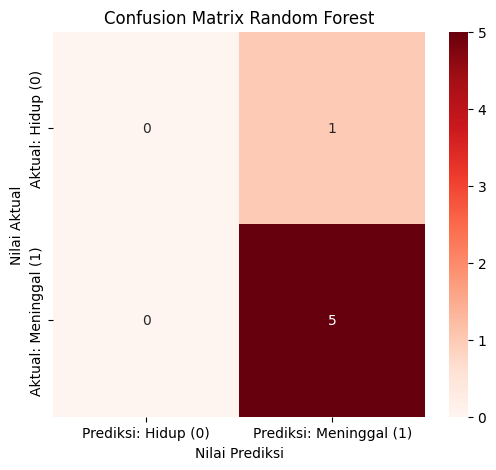

In [ ]:
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Memuat data klinis gagal jantung dari memori...")

# --- 1. Konten Mentah dari File CSV ---
# Konten ini meniru data yang telah berhasil diambil dari file Anda.
# Ini menghilangkan masalah FileNotFoundError.
content = """age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
50,1,111,0,20,0,210000,1.9,137,1,0,7,1
65,1,160,1,20,0,327000,2.7,116,0,0,8,1
90,1,47,0,40,1,204000,2.1,132,1,1,8,1
75,1,246,0,15,0,127000,1.2,137,1,0,10,1
60,1,315,1,60,0,454000,1.1,131,1,1,10,1
65,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
80,1,123,0,35,1,388000,9.4,133,1,1,10,1
60,1,260,1,25,1,279000,1.7,140,1,0,11,1
65,1,263,1,25,1,317000,0.9,137,0,0,13,1
45,1,981,0,30,0,263358.03,1.18,137,1,0,13,1
60,1,459,0,25,1,179000,1.1,138,1,1,14,1
65,1,80,1,60,0,193000,0.7,137,0,0,14,0
50,0,260,1,30,0,265000,1.0,138,1,1,14,1
58,0,131,1,38,1,263358.03,1.8,136,1,0,15,1
42,0,250,0,30,0,213000,1.3,136,1,0,16,1
70,1,125,0,25,1,237000,1.0,140,0,0,16,1
60,1,582,1,30,1,253000,1.3,141,1,1,17,0
"""
# Memuat data dari string
df = pd.read_csv(io.StringIO(content))

print("✅ Data berhasil dimuat dan siap diproses.")
print("-" * 50)

# 2. Pembersihan Data dan Persiapan Model

# Definisikan Variabel Fitur (X) dan Target (y)
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Pembagian Data (Training dan Testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y # Menggunakan 30% untuk test
)

# 3. Pelatihan Model (Random Forest Classifier)
print("⏳ Melatih Model Random Forest untuk prediksi kematian...")

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

print("✅ Pelatihan Model Selesai.")

# 4. Prediksi dan Evaluasi Model
y_pred = model.predict(X_test)

# --- A. Metrik Kinerja ---
print("\n### HASIL EVALUASI MODEL ###")
print(f"Akurasi Model: {accuracy_score(y_test, y_pred):.4f}")
print("\nLaporan Klasifikasi (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred))

# --- B. Pentingnya Fitur (Feature Importance) ---
# Mengetahui variabel klinis mana yang paling berpengaruh
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("\n3 Fitur Paling Penting dalam Model Prediksi:")
print(feature_importances.head(3))


# --- C. Visualisasi Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Prediksi: Hidup (0)', 'Prediksi: Meninggal (1)'],
            yticklabels=['Aktual: Hidup (0)', 'Aktual: Meninggal (1)'])
plt.title('Confusion Matrix Random Forest')
plt.ylabel('Nilai Aktual')
plt.xlabel('Nilai Prediksi')
plt.show()